# <font color="maroon">Template: Basic NMR</font>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/ColabNotebooks/Tpl_basicNMR.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

To use this template, you need to prepare a text file with NMR relaxation data in it (see [HETs_15N.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt) or [ubi_soln.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt) for example). If you intend to run on a local pyDR installation, then you just need to point pyDR to the file. If you want to run in Google Colab, the file needs to be available online somehow. My recommendation is to use a shared link from Google drive or something similar. 

One can also mount Google drive in Google Colab. Note that this poses [security risks](https://medium.com/mlearning-ai/careful-who-you-colab-with-fa8001f933e7). Basically, once Google Drive is mounted, the Python software could in principle send files in it to us, or we could delete things. We promise not to do that! However, I think it's worth mentioning that this in general poses a risk and you shouldn't mount Google Drive using untrusted notebooks.

## Parameters
Below, you find the parameters you would typically change for your own analysis

In [1]:
#Where's  your data??
path_to_nmr_data='data/HETs_15N.txt'  #Data stored locally
# path_to_nmr_data='https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt' #Github raw link
# path_to_nmr_data='https://drive.google.com/file/d/1w_0cR6ykjL7xvdxU2W90fRXvZ8XfLFc3/view?usp=share_link' #Google drive share link

# How many detectors
n=4

#Is there a PDB ID or saved topology file associated with your structure? 
#(set =None if no structure)
topo='2KJ3'

#What Nucleus did you measure? (see below for more explanation)
Nuc='N'  #This refers to the backbone nitrogen, specifically
segids='B' # The example data (HETs) has 3 copies of the molecule, so we need to specify this
# You will probably want to set segids=None

In [2]:
# SETUP pyDR
import os
os.chdir('..')
import sys
sys.path.append('../') # Path to pyDR location

In [3]:
#Imports
import pyDR

## Load NMR Data
The best way to get load your data depends if you're running locally (just point to the file) or if you're running online (download from somewhere, mount Google Drive)

 Note that you can use commands such as 'ls', 'cd', and 'pwd' if you're confused where your files are.

In [4]:
data=pyDR.IO.readNMR(path_to_nmr_data)

## Put data into a project

Projects are convenient ways to manage a lot of data, and provide convenient tools for overlaying data in 2D plots, as well as visualizing data in 3D in ChimeraX. Not used extensively in this template.

In [5]:
proj=pyDR.Project(directory=None)    #Include a directory to save the project
proj.append_data(data)

## Attach structure to the data
Download a pdb and attach it to the data object. For protein backbone dynamics, we recommend using the labels to provide the residue number, making this step easier.

Available bonds ('Nuc')
* N,15N,N15       : Backbone N and the directly bonded hydrogen 
* C,CO,13CO,CO13  : Backbone carbonyl carbon and the carbonyl oxygen
* CA,13CA,CA13    : Backbone CA and the directly bonded hydrogen (only HA1 for glycine)
* CACB            : Backbone CA and CB (not usually relaxation relevant)
* IVL/IVLA/CH3    : Methyl groups in Isoleucine/Valine/Leucine, or ILV+Alanine, or simply all methyl groups. Each methyl group returns 3 pairs, corresponding to each hydrogen
* IVL1/IVLA1/CH31 : Same as above, except only one pair
* IVLl/IVLAl/CH3l : Same as above, but with only the 'left' leucine and valine methyl group
* IVLr/IVLAr/CH3r : Same as above, but selects the 'right' methyl group
* FY_d,FY_e,FY_z  : Phenylalanine and Tyrosine H–C pairs at either the delta, epsilon, or  zeta positions.
* FY_d1,FY_e1,FY_z1:Same as above, but only one pair returned for each amino acid

We can also filter based on residues, segments, and a filter string ([MDAnalysis](https://docs.mdanalysis.org/stable/documentation_pages/selections.html) format).

In [6]:
if topo is not None and Nuc is not None:
    data.select=pyDR.MolSelect(topo=topo)
    data.select.select_bond(Nuc=Nuc,resids=data.label,segids=segids)

## Plot the data

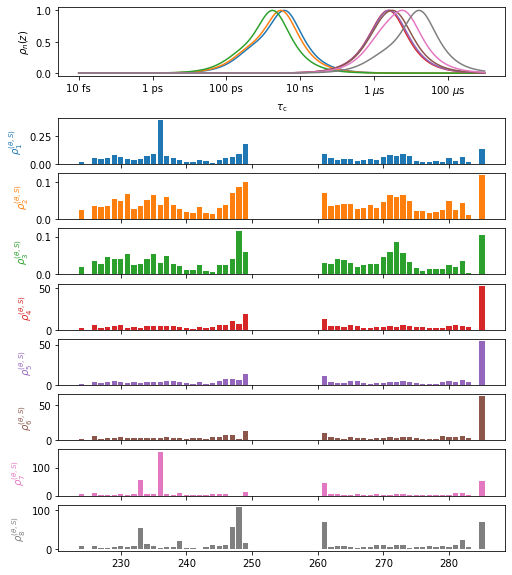

In [7]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

## Process NMR data

In [8]:
data.detect.r_auto(n)    #Set number of detectors here
if data.S2 is not None:
    data.detect.inclS2() #Include order parameters

fit=data.fit()  #Fit the data

## Plot the results

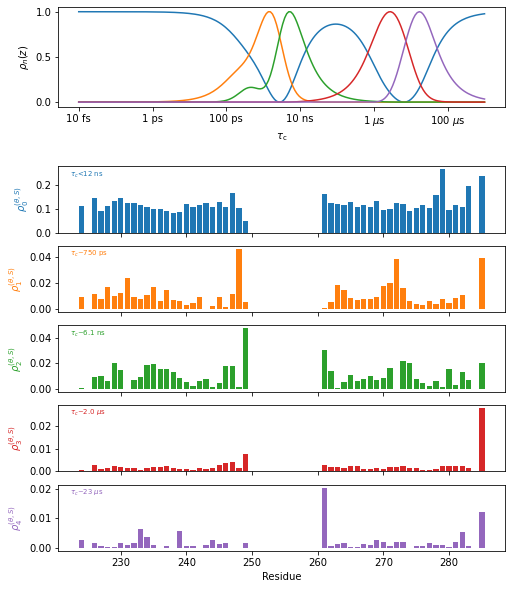

In [9]:
proj.close_fig('all')
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

## Plot the fit quality

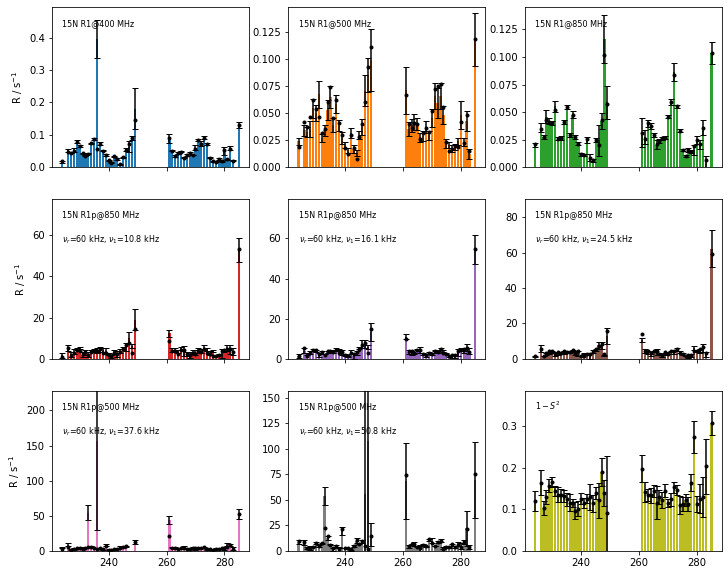

In [10]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

## Visualize with NGL viewer

In [11]:
fit.nglview(1)

NGLWidget(max_frame=19)

## Visualize with ChimeraX

In [12]:
fit.chimera()